In [4]:
from shapely.geometry.polygon import Polygon
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import time

In [ ]:
from argoverse.map_representation.map_api import ArgoverseMap
am = ArgoverseMap()  # map 操作对象

In [2]:
import sys
print(sys.path)
# sys.path.append('E:\\数据集\\03_Argoverse\\argoverse-api-master')

['E:\\argoverse-api-ccuse\\chenchencode\\tmp_test', 'E:\\argoverse-api-ccuse', 'E:\\LasVSim\\sumo-win64-1.6.0\\sumo-1.6.0\\tools', 'D:\\ProgramData\\Anaconda3\\python37.zip', 'D:\\ProgramData\\Anaconda3\\DLLs', 'D:\\ProgramData\\Anaconda3\\lib', 'D:\\ProgramData\\Anaconda3', '', 'C:\\Users\\Johnc\\AppData\\Roaming\\Python\\Python37\\site-packages', 'D:\\ProgramData\\Anaconda3\\lib\\site-packages', 'D:\\ProgramData\\Anaconda3\\lib\\site-packages\\locket-0.2.1-py3.7.egg', 'D:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32', 'D:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib', 'D:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin', 'D:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Johnc\\.ipython', 'D:\\Program Files\\JetBrains\\PyCharm 2020.2.1\\plugins\\python\\helpers\\pydev', 'D:\\Program Files\\JetBrains\\PyCharm 2020.2.1\\plugins\\python\\helpers-pro\\jupyter_debug']


In [3]:
centerline_ind = am.build_centerline_index()  # 建立两个城市车道中心线信息，输出字典
driverable_area = am.build_city_driveable_area_roi_index()   # 建立可行驶区域的信息字典
# am.city_lane_centerlines_dict

NameError: name 'am' is not defined

9611654
[2846.75211655 1533.932065   2871.93050371 1560.5971883 ]
[[2870.53829462 1535.2250282 ]
 [2868.05194769 1537.90222334]
 [2865.56396767 1540.57789377]
 [2863.0752968  1543.25291921]
 [2860.58662593 1545.92794465]
 [2858.09795507 1548.60297009]
 [2855.6092842  1551.27799553]
 [2853.12061333 1553.95302097]
 [2850.63194246 1556.62804641]
 [2848.14313249 1559.30294156]]


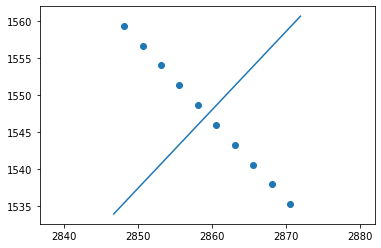

In [5]:
#[76,87,105,109,204,210,211,212,225,459,1047,1057,1077,1097,1106,1141,1431,1446,1447,2785]
mm = [2758]
for tt in mm:
    print(am.city_halluc_tableidx_to_laneid_map['PIT'][str(tt)])
    z = am.city_halluc_tableidx_to_laneid_map['PIT'][str(tt)]
    print(am.city_halluc_bbox_table['PIT'][tt])
    y = am.city_halluc_bbox_table['PIT'][tt]
    x = am.city_lane_centerlines_dict['PIT'][z].centerline
    print(x)
    xx = DataFrame(x)
    plt.scatter(xx[0],xx[1])
    plt.plot([y[0],y[2]],[y[1],y[3]])
    plt.axis('equal')

9604941
[2873.47123575 1526.87923865 2883.39872575 1540.7397631 ]
[[2877.00721486 1528.02497117]
 [2876.02789169 1529.32051275]
 [2875.33853652 1530.7791802 ]
 [2875.46852482 1532.29647258]
 [2876.25427548 1533.66936409]
 [2877.39801738 1534.82939637]
 [2878.57887508 1535.95403175]
 [2879.74185337 1537.09723768]
 [2880.90356177 1538.24176258]
 [2882.06527017 1539.38628748]]


(2872.974861253361, 2883.8951002461845, 1526.186212426223, 1541.4327893187526)

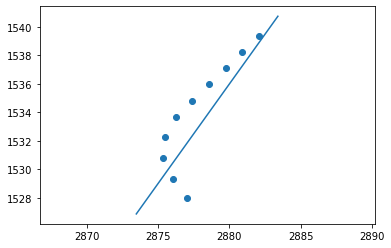

In [159]:
tt = 87
print(am.city_halluc_tableidx_to_laneid_map['PIT'][str(tt)])
z = am.city_halluc_tableidx_to_laneid_map['PIT'][str(tt)]
print(am.city_halluc_bbox_table['PIT'][tt])
y = am.city_halluc_bbox_table['PIT'][tt]
x = am.city_lane_centerlines_dict['PIT'][z].centerline
print(x)
xx = DataFrame(x)
plt.scatter(xx[0],xx[1])
plt.plot([y[0],y[2]],[y[1],y[3]])
plt.axis('equal')

[[2870.53829462 1535.2250282    13.10900497]
 [2868.05194769 1537.90222334   13.06429291]
 [2865.56396767 1540.57789377   12.97722721]
 [2863.0752968  1543.25291921   12.96173668]
 [2860.58662593 1545.92794465   12.87161446]
 [2858.09795507 1548.60297009   12.83018017]
 [2855.6092842  1551.27799553   12.7792902 ]
 [2853.12061333 1553.95302097   12.73366165]
 [2850.63194246 1556.62804641   12.67605591]
 [2848.14313249 1559.30294156   12.7042675 ]]


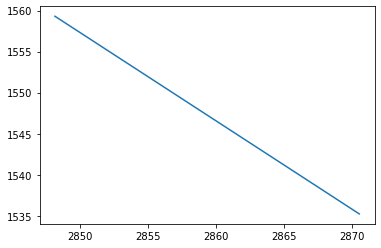

In [151]:
x = am.get_lane_segment_centerline(9611654,'PIT')
print(x)
xx = DataFrame(x)
plt.plot(xx[0],xx[1])

In [12]:
re_cl = am.find_local_lane_centerlines(2797.846904065839, 1376.479373891248,'PIT',query_search_range_manhattan=20)  # 某点周边的中心线
# print('re_cl', re_cl[0])
# display(Polygon(re_cl[0]))
re_cl_df = DataFrame(re_cl[0])
# print((re_cl_df))
# plt.scatter(re_cl_df[0],re_cl_df[1])

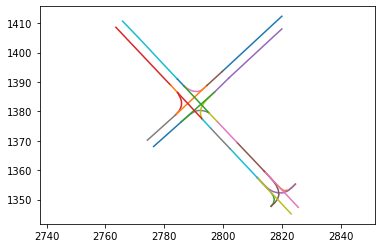

In [13]:
for i in range(len(re_cl)):
    x = re_cl[i]
    # display(Polygon(x))
    re_cl_df = DataFrame(x)
    plt.plot(re_cl_df[0],re_cl_df[1])
    plt.axis('equal')

(3177.835218554773, 3180.4695708555173, 1675.9701049415423, 1683.7697484795092)

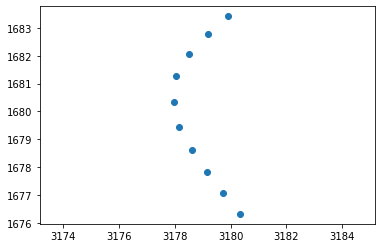

In [39]:
re_cl_df = DataFrame(re_cl[3])
plt.scatter(re_cl_df[0],re_cl_df[1])
plt.axis('equal')

In [32]:
re_pl = am.find_local_lane_polygons([3035,3292,1540,1800],'PIT')
print(len(re_pl))
i = 2
# print('re_pl', re_pl[i])
# display(Polygon(re_pl[i]))
re_pl_df = DataFrame(re_pl[i])
# print((re_pl_df))
# plt.scatter(re_pl_df[0],re_pl_df[1])

199


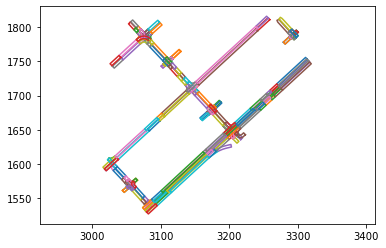

In [25]:
for i in range(len(re_pl)):
    x = re_pl[i]
    # display(Polygon(x))
    re_pl_df = DataFrame(x)
    plt.plot(re_pl_df[0],re_pl_df[1])
    plt.axis('equal')

In [9]:
traj = np.array([[3181,1671],[3178,1675],[3176,1680],[3170,1675]])
altraj = am.get_candidate_centerlines_for_traj(traj,'PIT')
print(len(altraj))
for i in range(len(altraj)):
    plt.scatter(DataFrame(traj)[0],DataFrame(traj)[1])
    x = DataFrame(altraj[i])
    plt.plot(x[0],x[1])
    plt.axis('equal')
#     plt.pause(1)
#     plt.show()
#     time.sleep(0.5)
    # plt.show()
plt.show()

2


<IPython.core.display.Javascript object>

## 坐标旋转测试
使用se2

In [2]:
from argoverse.utils.se2 import SE2
import numpy as np

In [17]:
# 构造旋转矩阵
def rotation_mat(theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    r_mat = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
    print('theta: %f\nr_mat: \n%s'%(theta,r_mat))
    return np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])

In [123]:
# 旋转测试
theta = np.pi * 1 / 4
detha = 0
translation_vector = np.array([np.sin(detha), 0])
rotation_matrix = rotation_mat(theta)
dst_se2_src = SE2(rotation=rotation_matrix, translation=translation_vector)

theta: 0.785398
r_mat: 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [124]:
transformed_pts = np.array([[1.5, 2.0], [1, 2.5], [0.5, 2], [8, 3.0], [1,0]])
pts = dst_se2_src.transform_point_cloud(transformed_pts)
print(pts)

[[-0.35355339  2.47487373]
 [-1.06066017  2.47487373]
 [-1.06066017  1.76776695]
 [ 3.53553391  7.77817459]
 [ 0.70710678  0.70710678]]


In [125]:
transformed_pts = np.array([[1.5, 2.0], [1, 2.5], [0.5, 2], [1,0], [1,0]])
pts = dst_se2_src.inverse_transform_point_cloud(transformed_pts)
print(pts)

[[ 2.47487373  0.35355339]
 [ 2.47487373  1.06066017]
 [ 1.76776695  1.06066017]
 [ 0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [83]:
x = np.load('../map_files/PIT_10314_halluc_bbox_table.npy')

In [87]:
import pandas as pd
pd.DataFrame(x).to_csv('e:/数据集/03_Argoverse/tmp.csv')





